In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
churn_df = pd.read_csv("Customer Churn.csv")

In [4]:
churn_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
churn_df.isnull().sum().sum()

np.int64(0)

In [7]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [22]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

churn_df['SeniorCitizen'] = churn_df["SeniorCitizen"].apply(conv)
churn_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1.What is the overall churn rate in the dataset?

In [9]:
# Calculate churn rate
total_customers = len(churn_df)
churned_customers = churn_df[churn_df["Churn"] == "Yes"].shape[0]
churn_rate = (churned_customers / total_customers) * 100

# Display the churn rate
churn_rate


26.536987079369588

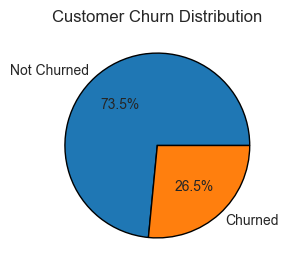

In [23]:
# Create a pie chart for churn distribution
churn_counts = churn_df["Churn"].value_counts()
labels = ["Not Churned", "Churned"]

plt.figure(figsize=(3, 3))
plt.pie(churn_counts, labels=labels, autopct="%1.1f%%", wedgeprops={"edgecolor": "black"})
plt.title("Customer Churn Distribution")
plt.show()

2.How does churn vary across different customer demographics (gender, senior citizen, partner, dependents)?

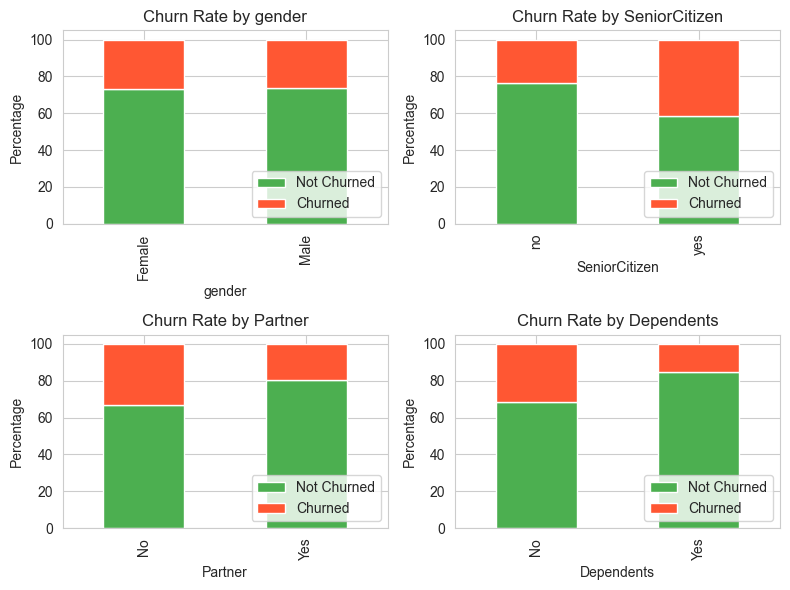

In [29]:
# Set plot style
sns.set_style("whitegrid")

# Define demographic columns for analysis
demographics = ["gender", "SeniorCitizen", "Partner", "Dependents"]

# Create subplots for each demographic category
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

# Plot churn distribution for each demographic category
for i, col in enumerate(demographics):
    churn_rates = churn_df.groupby(col)["Churn"].value_counts(normalize=True).unstack() * 100
    churn_rates.plot(kind="bar", stacked=True, color=["#4CAF50", "#FF5733"], ax=axes[i])
    axes[i].set_title(f"Churn Rate by {col}")
    axes[i].set_ylabel("Percentage")
    axes[i].legend(["Not Churned", "Churned"], loc="lower right")


plt.tight_layout()
plt.show()


3.What is the average tenure of customers who churn vs. those who stay?

In [31]:

# Calculate average tenure for churned vs. non-churned customers
avg_tenure = churn_df.groupby("Churn")["tenure"].mean()

# Display results
avg_tenure


Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

The average tenure for customers who stayed is 37.57 months, while the average tenure for customers who churned is only 17.98 months.
This suggests that customers who churn tend to leave early, within the first 18 months on average.

In [ ]:
plt.figure(figsize=(5, 3))
labels = ["yes", "no"]
plt.bar(labels, avg_tenure)
    
plt.xlabel("Customer Status")
plt.ylabel("Number of Customers")
plt.title("Average Tenure")
plt.show()

4.How do monthly and total charges compare between churned and non-churned customers?


In [46]:
# monthly and total charges compare between churned and non-churned customers

churn_df["TotalCharges"] = pd.to_numeric(churn_df["TotalCharges"], errors="coerce")

charges_comparison = churn_df.groupby("Churn")[["MonthlyCharges", "TotalCharges"]].mean()

# Display results
charges_comparison


,MonthlyCharges,TotalCharges
Churn,,
No,61.265124,2555.344141
Yes,74.441332,1531.796094


C:\Users\varsh\AppData\Local\Temp\ipykernel_33528\1034170487.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=churn_df, ax=axes[0], palette=["#4CAF50", "#FF5733"])
C:\Users\varsh\AppData\Local\Temp\ipykernel_33528\1034170487.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="TotalCharges", data=churn_df, ax=axes[1], palette=["#4CAF50", "#FF5733"])


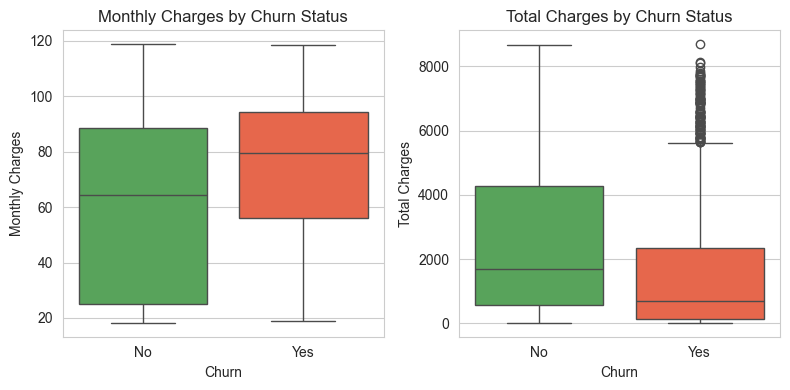

In [50]:
# Create a boxplot to visualize the distribution of MonthlyCharges and TotalCharges by Churn status
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Monthly Charges Boxplot
sns.boxplot(x="Churn", y="MonthlyCharges", data=churn_df, ax=axes[0], palette=["#4CAF50", "#FF5733"])
axes[0].set_title("Monthly Charges by Churn Status")
axes[0].set_ylabel("Monthly Charges")

# Total Charges Boxplot
sns.boxplot(x="Churn", y="TotalCharges", data=churn_df, ax=axes[1], palette=["#4CAF50", "#FF5733"])
axes[1].set_title("Total Charges by Churn Status")
axes[1].set_ylabel("Total Charges")

plt.tight_layout()
plt.show()


This suggests that customers with higher monthly charges are more likely to churn. 

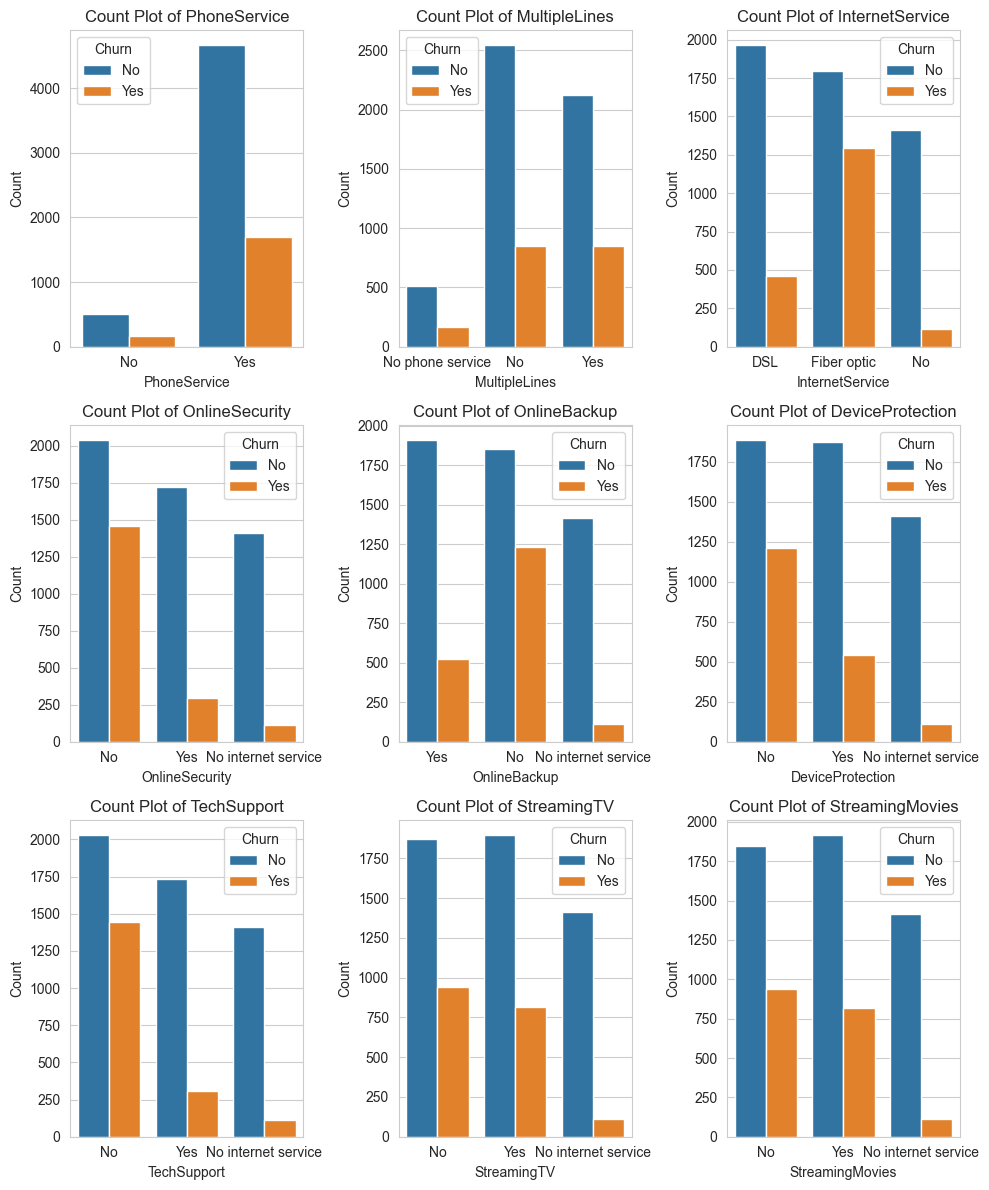

In [51]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid 
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4))  
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=churn_df, ax=axes[i], hue = churn_df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

5.Does having PhoneService or MultipleLines impact customer churn?
 

 From the above observation MultipleLines doesn't have more impact than PhoneService on customer churn.

6.How does InternetService type (DSL, Fiber optic, No Internet) relate to churn?

Fiber optic users have the highest churn rate.
DSL users churn less compared to Fiber optic users.
Customers with No Internet Service have the lowest churn rate (likely because they don't use many services).

7.Do customers with OnlineSecurity, OnlineBackup, or TechSupport have a lower churn rate?

Customers who do not have OnlineSecurity, OnlineBackup, or TechSupport churn more.
Having these services seems to help in customer retention.


8.Which contract type (Month-to-month, One year, Two years) has the highest churn rate?


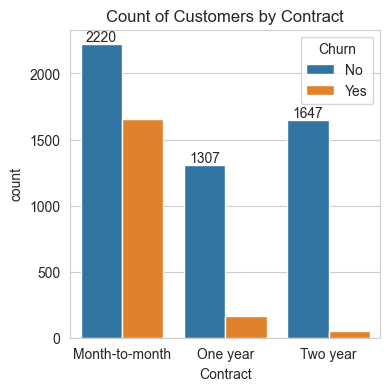

In [52]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = churn_df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Contract")
plt.show()

Customers with Month-to-Month contracts have the highest churn rate.
One-year and Two-year contracts have significantly lower churn, indicating longer commitments reduce churn.

8.How does PaperlessBilling impact customer churn?

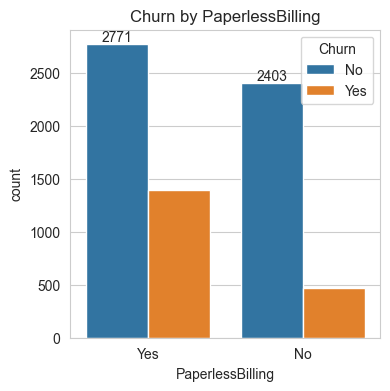

In [53]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "PaperlessBilling", data = churn_df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by PaperlessBilling")
plt.show()

Customers using PaperlessBilling churn more compared to those who don’t

9.What PaymentMethod is most commonly used by churned customers?

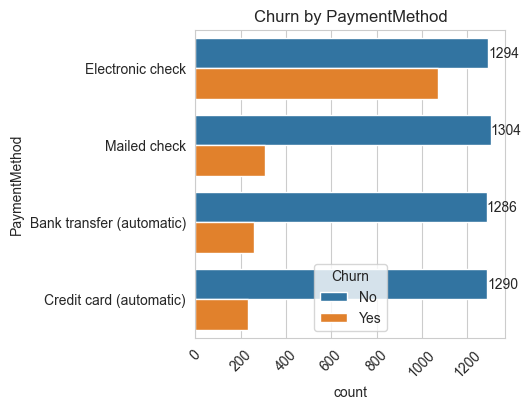

In [56]:
plt.figure(figsize = (4,4))
ax = sns.countplot(y = "PaymentMethod", data = churn_df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

Electronic check is the most common payment method among churned customers.
Credit card, bank transfers, and mailed checks have lower churn rates.

11.Are there any strong correlations between tenure and churn?

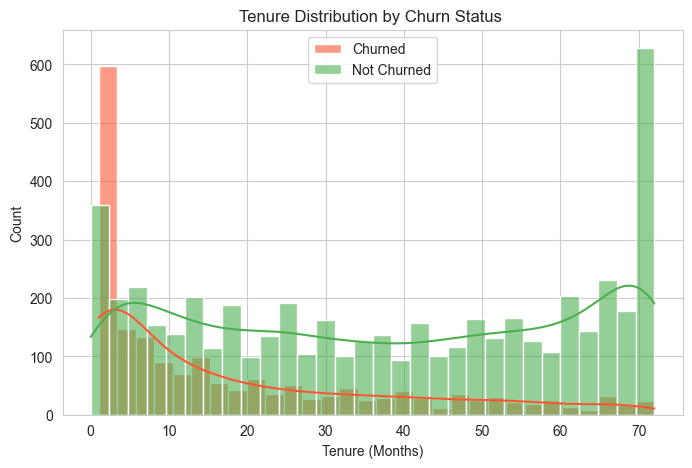

In [58]:
# Plot tenure distribution with histograms instead of KDE to avoid potential issues
plt.figure(figsize=(8, 5))
sns.histplot(churn_df[churn_df["Churn"] == "Yes"]["tenure"], label="Churned", color="#FF5733", bins=30, alpha=0.6, kde=True)
sns.histplot(churn_df[churn_df["Churn"] == "No"]["tenure"], label="Not Churned", color="#4CAF50", bins=30, alpha=0.6, kde=True)
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.title(f"Tenure Distribution by Churn Status ")
plt.legend()
plt.show()


Yes! The correlation between tenure and churn is negative (≈ -0.35), meaning that as tenure increases, the likelihood of churn decreases.

Key Observations:
Customers with shorter tenures (0-12 months) are more likely to churn.
Customers with longer tenures (above 24 months) have much lower churn rates.
This suggests that early-stage customers are at higher risk of leaving, and retention strategies should focus on engaging them early.

12.Can we identify high-risk customer groups based on their usage patterns and contract type?


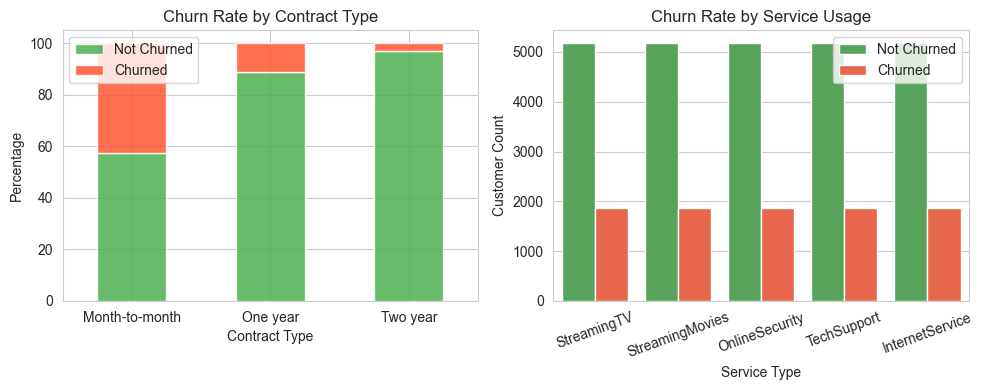

In [62]:
# Grouping data by Contract Type and Service Usage for Churn analysis
contract_service_churn = churn_df.groupby(["Contract", "Churn"]).size().unstack()

# Normalize by contract type to get churn percentages
contract_service_churn_pct = contract_service_churn.div(contract_service_churn.sum(axis=1), axis=0) * 100

# Services to analyze
services = ["StreamingTV", "StreamingMovies", "OnlineSecurity", "TechSupport", "InternetService"]

# Transform data for better visualization
df_long = churn_df.melt(id_vars=["Churn"], value_vars=services, var_name="Service", value_name="Status")

# Create subplots for Contract Type and Service Usage impact on Churn
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Churn by Contract Type (Stacked Bar Chart)
contract_service_churn_pct.plot(kind="bar", stacked=True, color=["#4CAF50", "#FF5733"], alpha=0.85, ax=axes[0])
axes[0].set_xlabel("Contract Type")
axes[0].set_ylabel("Percentage")
axes[0].set_title("Churn Rate by Contract Type")
axes[0].legend(["Not Churned", "Churned"])
axes[0].tick_params(axis='x', rotation=0)

# Churn by Service Usage (Countplot)
sns.countplot(x="Service", hue="Churn", data=df_long, palette=["#4CAF50", "#FF5733"], ax=axes[1])
axes[1].set_title("Churn Rate by Service Usage")
axes[1].set_xlabel("Service Type")
axes[1].set_ylabel("Customer Count")
axes[1].tick_params(axis='x', rotation=20)
axes[1].legend(["Not Churned", "Churned"])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


Here are the combined charts showing churn rates by contract type and service usage:
Left Chart: Month-to-month contract customers churn the most, while longer contracts reduce churn.
Right Chart: Customers without OnlineSecurity and TechSupport churn more, and Fiber optic users have higher churn rates